In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score ,roc_auc_score, roc_curve
from sklearn.metrics import classification_report , plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path



In [5]:
df = pd.read_csv('clean_drop1.csv')

In [6]:
#select features with highest corr
df.head()

,Raceeth_2.0,Raceeth_3.0,Raceeth_4.0,Raceeth_5.0,Raceeth_6.0,Raceeth_7.0,Raceeth_8.0,Gender_2.0,Bullying_at_school_2.0,Electronic_bullying_2.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
0,0,0,0,0,0,1,0,1,1,1,...,2.0,4.0,2.0,2.0,6.0,5.0,1.0,1.0,1.0,0.0
1,0,0,0,0,0,0,1,1,0,1,...,1.0,4.0,2.0,1.0,7.0,6.0,1.0,1.0,1.0,1.0
2,0,0,0,0,0,0,1,0,1,1,...,1.0,5.0,2.0,1.0,5.0,1.0,1.0,3.0,1.0,0.0
3,0,0,0,1,0,0,0,1,1,1,...,1.0,4.0,3.0,1.0,6.0,1.0,1.0,3.0,1.0,1.0
4,0,0,0,0,1,0,0,1,1,1,...,1.0,2.0,1.0,3.0,6.0,2.0,1.0,3.0,2.0,0.0


In [7]:
df_open = df[['Gender_2.0','Asthma_2.0','Asthma_3.0','Food_allergies_2.0','Food_allergies_3.0','Difficulty_concentrating_2.0',
        'Oral_health_care_2.0','Oral_health_care_3.0','Oral_health_care_4.0','Oral_health_care_5.0','Weight_loss_2.0','Weight_loss_3.0','Weight_loss_4.0',
        'Grade','Perception_of_weight','Fruit_juice_drinking','Fruit_eating','Green_salad_eating','Potato_eating','Carrot_eating','Other_vegetable_eating','No_soda_drinking','No_milk_drinking','Breakfast_eating','Physical_activity_>=_5_days','Television_watching',
        'Seat_belt_use','Computer_use','PE_attendance','Sports_team_participation','Concussion','Sleep','Grades_in_school','Sports_drinks','Plain_water','Muscle_strengthening','Indoor_tanning','Sunscreen','How_well_speak_English','Tried_weed']]


In [8]:
corr_matrix = df_open.corr()
corr_matrix

,Gender_2.0,Asthma_2.0,Asthma_3.0,Food_allergies_2.0,Food_allergies_3.0,Difficulty_concentrating_2.0,Oral_health_care_2.0,Oral_health_care_3.0,Oral_health_care_4.0,Oral_health_care_5.0,...,Concussion,Sleep,Grades_in_school,Sports_drinks,Plain_water,Muscle_strengthening,Indoor_tanning,Sunscreen,How_well_speak_English,Tried_weed
Gender_2.0,1.000000,-0.014760,0.003655,0.079309,-0.016078,0.128981,0.002835,0.008386,0.034613,0.021711,...,0.062763,0.050508,0.109757,0.152551,-0.030032,0.190403,-0.035029,-0.161486,0.063252,0.000698
Asthma_2.0,-0.014760,1.000000,-0.363825,0.106865,-0.021368,0.082860,0.013002,-0.014551,0.011773,-0.026135,...,-0.065387,0.075700,-0.044070,-0.020865,0.022317,0.022129,-0.036283,0.014477,-0.036473,-0.034864
Asthma_3.0,0.003655,-0.363825,1.000000,-0.046648,0.054255,-0.038683,0.022163,0.020452,0.016767,0.087627,...,0.070142,-0.020809,0.085246,0.034646,-0.038864,-0.012731,0.070299,-0.003763,0.099495,0.008592
Food_allergies_2.0,0.079309,0.106865,-0.046648,1.000000,-0.593620,0.238478,0.024989,-0.004324,-0.001066,-0.020342,...,-0.046464,0.057450,-0.015374,-0.033827,-0.038624,-0.003010,-0.051534,-0.001034,-0.053071,0.003757
Food_allergies_3.0,-0.016078,-0.021368,0.054255,-0.593620,1.000000,-0.129807,-0.005282,0.005988,0.027106,0.058249,...,0.023312,-0.016645,0.048780,0.041078,0.001870,-0.015181,0.022110,-0.019388,0.084880,-0.020043
Difficulty_concentrating_2.0,0.128981,0.082860,-0.038683,0.238478,-0.129807,1.000000,-0.009063,-0.058340,-0.011291,-0.040451,...,-0.051268,0.183741,-0.145571,-0.011641,0.016788,0.101998,-0.047820,0.049404,-0.062626,-0.164226
Oral_health_care_2.0,0.002835,0.013002,0.022163,0.024989,-0.005282,-0.009063,1.000000,-0.083415,-0.051590,-0.101242,...,0.029897,-0.051694,0.098076,0.009493,-0.043927,-0.037047,-0.006740,-0.057057,0.021008,0.030982
Oral_health_care_3.0,0.008386,-0.014551,0.020452,-0.004324,0.005988,-0.058340,-0.083415,1.000000,-0.028066,-0.055078,...,0.033474,-0.043124,0.061880,0.005107,-0.024675,-0.043702,0.006057,-0.056426,0.019802,0.045125
Oral_health_care_4.0,0.034613,0.011773,0.016767,-0.001066,0.027106,-0.011291,-0.051590,-0.028066,1.000000,-0.034064,...,0.068819,-0.029564,0.080604,0.021198,-0.087106,-0.042590,0.109563,-0.065573,0.105512,0.005683
Oral_health_care_5.0,0.021711,-0.026135,0.087627,-0.020342,0.058249,-0.040451,-0.101242,-0.055078,-0.034064,1.000000,...,0.042275,0.001037,0.133073,0.019794,-0.062127,-0.039263,0.018607,-0.063762,0.101664,-0.021321


In [9]:
s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort")
print (so)

Food_allergies_3.0  Food_allergies_2.0   -0.593620
Food_allergies_2.0  Food_allergies_3.0   -0.593620
Asthma_3.0          Asthma_2.0           -0.363825
Asthma_2.0          Asthma_3.0           -0.363825
Weight_loss_3.0     Weight_loss_2.0      -0.304971
                                            ...   
Breakfast_eating    Breakfast_eating      1.000000
No_milk_drinking    No_milk_drinking      1.000000
No_soda_drinking    No_soda_drinking      1.000000
PE_attendance       PE_attendance         1.000000
Tried_weed          Tried_weed            1.000000
Length: 1600, dtype: float64


In [10]:
so.to_csv('so_open.csv') 

In [11]:
lasso_model = Lasso(alpha = 0.05)    
selected_columns = list(df_open.columns)
lasso_model.fit(df_open.iloc[:, :-1], df_open.iloc[:, -1])
list(zip(selected_columns, lasso_model.coef_))

[('Gender_2.0', -0.0),
 ('Asthma_2.0', -0.0),
 ('Asthma_3.0', 0.0),
 ('Food_allergies_2.0', 0.0),
 ('Food_allergies_3.0', -0.0),
 ('Difficulty_concentrating_2.0', -0.0),
 ('Oral_health_care_2.0', 0.0),
 ('Oral_health_care_3.0', 0.0),
 ('Oral_health_care_4.0', -0.0),
 ('Oral_health_care_5.0', -0.0),
 ('Weight_loss_2.0', 0.0),
 ('Weight_loss_3.0', -0.0),
 ('Weight_loss_4.0', -0.0),
 ('Grade', 0.04251740906201885),
 ('Perception_of_weight', 0.0),
 ('Fruit_juice_drinking', 0.0018472157670284207),
 ('Fruit_eating', 0.0),
 ('Green_salad_eating', 0.0),
 ('Potato_eating', 0.0),
 ('Carrot_eating', 0.0),
 ('Other_vegetable_eating', -0.0),
 ('No_soda_drinking', 0.0008235354937242878),
 ('No_milk_drinking', -0.0),
 ('Breakfast_eating', -0.020286989093171188),
 ('Physical_activity_>=_5_days', 0.0),
 ('Television_watching', 0.0),
 ('Seat_belt_use', -0.024996371178656912),
 ('Computer_use', 0.0),
 ('PE_attendance', 0.0),
 ('Sports_team_participation', 0.0),
 ('Concussion', 0.0),
 ('Sleep', -0.0),
 ('

In [12]:
X = df_open[[
'Sunscreen',
'Breakfast_eating',
'Grade',
'Sports_drinks',
'Indoor_tanning']]

y = df_open.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### KNN using RandomizedSearchCV

In [15]:
# define the parameter values that should be searched
k_range = list(range(63, 75))
weight_options = ['uniform', 'distance']

In [16]:
knn = KNeighborsClassifier()

In [17]:

# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [18]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='roc_auc', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.718207,0.017854,"{'weights': 'uniform', 'n_neighbors': 73}"
1,0.717510,0.017176,"{'weights': 'uniform', 'n_neighbors': 64}"
2,0.689758,0.016276,"{'weights': 'distance', 'n_neighbors': 71}"
3,0.717269,0.017898,"{'weights': 'uniform', 'n_neighbors': 72}"
4,0.689633,0.016383,"{'weights': 'distance', 'n_neighbors': 72}"
5,0.689790,0.016393,"{'weights': 'distance', 'n_neighbors': 74}"
6,0.689575,0.016321,"{'weights': 'distance', 'n_neighbors': 69}"
7,0.717423,0.017149,"{'weights': 'uniform', 'n_neighbors': 68}"
8,0.690128,0.016273,"{'weights': 'distance', 'n_neighbors': 65}"
9,0.690180,0.016382,"{'weights': 'distance', 'n_neighbors': 63}"


In [19]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.718206536372652
{'weights': 'uniform', 'n_neighbors': 73}


In [20]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=73, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=73)

In [21]:
# make a prediction on out-of-sample data
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


[[1440  184]
 [ 630  396]]
0.6928301886792453
0.6363322098349321


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.89      0.78      1624
         1.0       0.68      0.39      0.49      1026

    accuracy                           0.69      2650
   macro avg       0.69      0.64      0.64      2650
weighted avg       0.69      0.69      0.67      2650



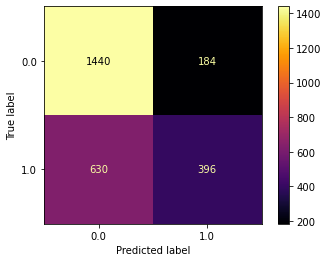

In [23]:
plot_confusion_matrix(knn, X_test, y_test, cmap='inferno')  
plt.show()  

### Logistic Regression using RandomizedSearchCV

In [24]:
# define the parameter values that should be searched
solver_options =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty_options = ['l1', 'l2']
iter_range = [100,200,300]
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']

In [25]:
logr =LogisticRegression(random_state = 0)

In [26]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(solver=solver_options , max_iter=iter_range, penalty = penalty_options)

In [27]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(logr, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,NaN,NaN,"{'solver': 'newton-cg', 'penalty': 'l1', 'max_..."
1,NaN,NaN,"{'solver': 'lbfgs', 'penalty': 'l1', 'max_iter..."
2,0.654019,0.008768,"{'solver': 'liblinear', 'penalty': 'l1', 'max_..."
3,NaN,NaN,"{'solver': 'sag', 'penalty': 'l1', 'max_iter':..."
4,0.654019,0.008768,"{'solver': 'saga', 'penalty': 'l1', 'max_iter'..."
5,0.654019,0.008768,"{'solver': 'newton-cg', 'penalty': 'l2', 'max_..."
6,0.654019,0.008768,"{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter..."
7,0.654019,0.008768,"{'solver': 'liblinear', 'penalty': 'l2', 'max_..."
8,0.654019,0.008768,"{'solver': 'sag', 'penalty': 'l2', 'max_iter':..."
9,0.654019,0.008768,"{'solver': 'saga', 'penalty': 'l2', 'max_iter'..."


In [28]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.654018743207369
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}


In [29]:
# train your model using all data and the best known parameters
logr = LogisticRegression(solver= 'liblinear')
logr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [30]:
# make a prediction on out-of-sample data
y_pred = logr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1442  182]
 [ 695  331]]
0.6690566037735849
0.6052715601263696


In [31]:
print(classification_report(y_test, y_pred)) #this is worse than simple

              precision    recall  f1-score   support

         0.0       0.67      0.89      0.77      1624
         1.0       0.65      0.32      0.43      1026

    accuracy                           0.67      2650
   macro avg       0.66      0.61      0.60      2650
weighted avg       0.66      0.67      0.64      2650



### SVC using RandomizedSearchCV

In [32]:
# define the parameter values that should be searched
kernel_options = ['linear', 'poly', 'rbf', 'sigmoid']
#solver_options =['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#penalty_options = ['l1', 'l2']
#iter_range = [100,200,300]
#k_range = list(range(1, 31))
#weight_options = ['uniform', 'distance']

In [33]:
svcr =SVC(random_state = 0)

In [34]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(kernel=kernel_options)

In [35]:
# n_iter controls the number of searches #'accuracy'  'roc_auc'
rand = RandomizedSearchCV(svcr, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]  

C:\Users\sabri\miniconda3\envs\metis\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


,mean_test_score,std_test_score,params
0,0.632503,0.003141,{'kernel': 'linear'}
1,0.634014,0.004621,{'kernel': 'poly'}
2,0.686012,0.008810,{'kernel': 'rbf'}
3,0.558507,0.026543,{'kernel': 'sigmoid'}


In [36]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.686011634329289
{'kernel': 'rbf'}


In [37]:
# train your model using all data and the best known parameters
svcr =SVC(random_state = 0, kernel='rbf')
svcr.fit(X_train, y_train)

SVC(random_state=0)

In [38]:
# make a prediction on out-of-sample data
y_pred = svcr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1497  127]
 [ 707  319]]
0.6852830188679245
0.616357104446941


In [39]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78      1624
         1.0       0.72      0.31      0.43      1026

    accuracy                           0.69      2650
   macro avg       0.70      0.62      0.61      2650
weighted avg       0.69      0.69      0.65      2650



In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1546   78]
 [ 881  145]]
0.6381132075471698
0.546647989706066


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.64      0.95      0.76      1624
         1.0       0.65      0.14      0.23      1026

    accuracy                           0.64      2650
   macro avg       0.64      0.55      0.50      2650
weighted avg       0.64      0.64      0.56      2650



In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

[[1335  289]
 [ 614  412]]
0.659245283018868
0.6118018945832012


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.82      0.75      1624
         1.0       0.59      0.40      0.48      1026

    accuracy                           0.66      2650
   macro avg       0.64      0.61      0.61      2650
weighted avg       0.65      0.66      0.64      2650



### Random Forest using RandomizedSearchCV

In [46]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
criterion_options =['gini','entropy']

In [47]:
rf= RandomForestClassifier(random_state = 0)

In [48]:
#penalty = penalty_options
# specify "parameter distributions" rather than a "parameter grid"
#param_dist = dict(solver=solver_options , max_iter=iter_range, penalty = penalty_options)

In [49]:
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap , 'criterion' : criterion_options}

In [50]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=30, random_state=5, return_train_score=False, n_jobs= -1)
rand.fit(X_train, y_train)
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.685257,0.010999,"{'n_estimators': 1200, 'min_samples_split': 2,..."
1,0.698470,0.011072,"{'n_estimators': 1000, 'min_samples_split': 2,..."
2,0.685446,0.011343,"{'n_estimators': 2000, 'min_samples_split': 10..."
3,0.692051,0.011162,"{'n_estimators': 1400, 'min_samples_split': 5,..."
4,0.688276,0.010398,"{'n_estimators': 1400, 'min_samples_split': 10..."
5,0.675631,0.008300,"{'n_estimators': 200, 'min_samples_split': 2, ..."
6,0.683748,0.009988,"{'n_estimators': 600, 'min_samples_split': 5, ..."
7,0.684125,0.011268,"{'n_estimators': 200, 'min_samples_split': 10,..."
8,0.673084,0.008919,"{'n_estimators': 600, 'min_samples_split': 2, ..."
9,0.685636,0.010168,"{'n_estimators': 2000, 'min_samples_split': 10..."


In [51]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.7002627077876957
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [52]:
# train your model using all data and the best known parameters
rf= RandomForestClassifier(random_state = 0,n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 4, max_features ='sqrt', max_depth = 50, criterion = 'entropy', bootstrap = True)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400, random_state=0)

In [53]:
# make a prediction on out-of-sample data
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))


[[1392  232]
 [ 578  448]]
0.6943396226415094
0.646895015316068


In [54]:
print(classification_report(y_test, y_pred)) #f1 is 0.01 better than simple

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.77      1624
         1.0       0.66      0.44      0.53      1026

    accuracy                           0.69      2650
   macro avg       0.68      0.65      0.65      2650
weighted avg       0.69      0.69      0.68      2650



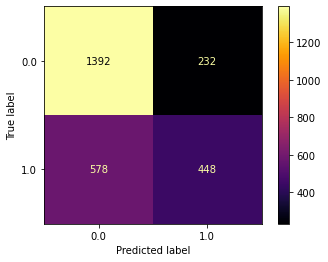

In [55]:
plot_confusion_matrix(rf, X_test, y_test, cmap='inferno')  
plt.show()  

In [56]:

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

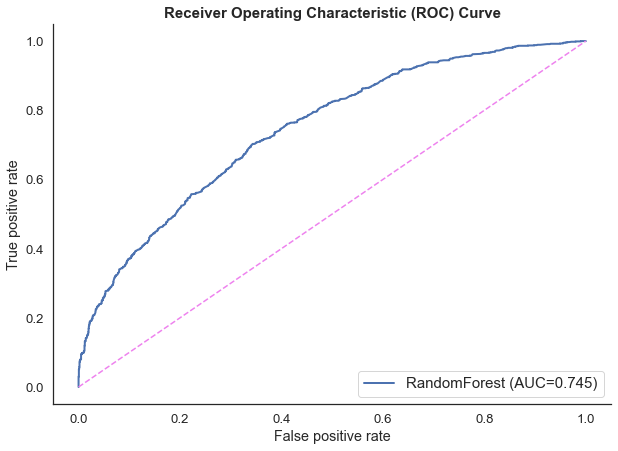

In [57]:

sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
plt.plot(fpr, tpr,lw=2,label='RandomForest (AUC={:.3f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc="lower right",fontsize=15)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',weight='bold',fontsize=15);
sns.despine()
plt.savefig('ROCplot.png',transparent=True, bbox_inches='tight')

In [58]:
#try gridsearch on RF
#https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167
 #   https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c
        
  #      shl we update the KNNimputer? to 29?

In [59]:
df_impt = pd.DataFrame({'features':X.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=False)
df_impt

,features,importance
1,Breakfast_eating,0.226257
3,Sports_drinks,0.215136
4,Indoor_tanning,0.213555
0,Sunscreen,0.210337
2,Grade,0.134715


In [60]:
df_impt.head(5)

,features,importance
1,Breakfast_eating,0.226257
3,Sports_drinks,0.215136
4,Indoor_tanning,0.213555
0,Sunscreen,0.210337
2,Grade,0.134715


In [61]:
df_open_s = df_open[['Sleep',
'Sunscreen',
'Breakfast_eating',
'Difficulty_concentrating_2.0',
'Seat_belt_use',
'Grade',
'Sports_drinks',
'Indoor_tanning',
'Grades_in_school',
'No_soda_drinking','Tried_weed']]

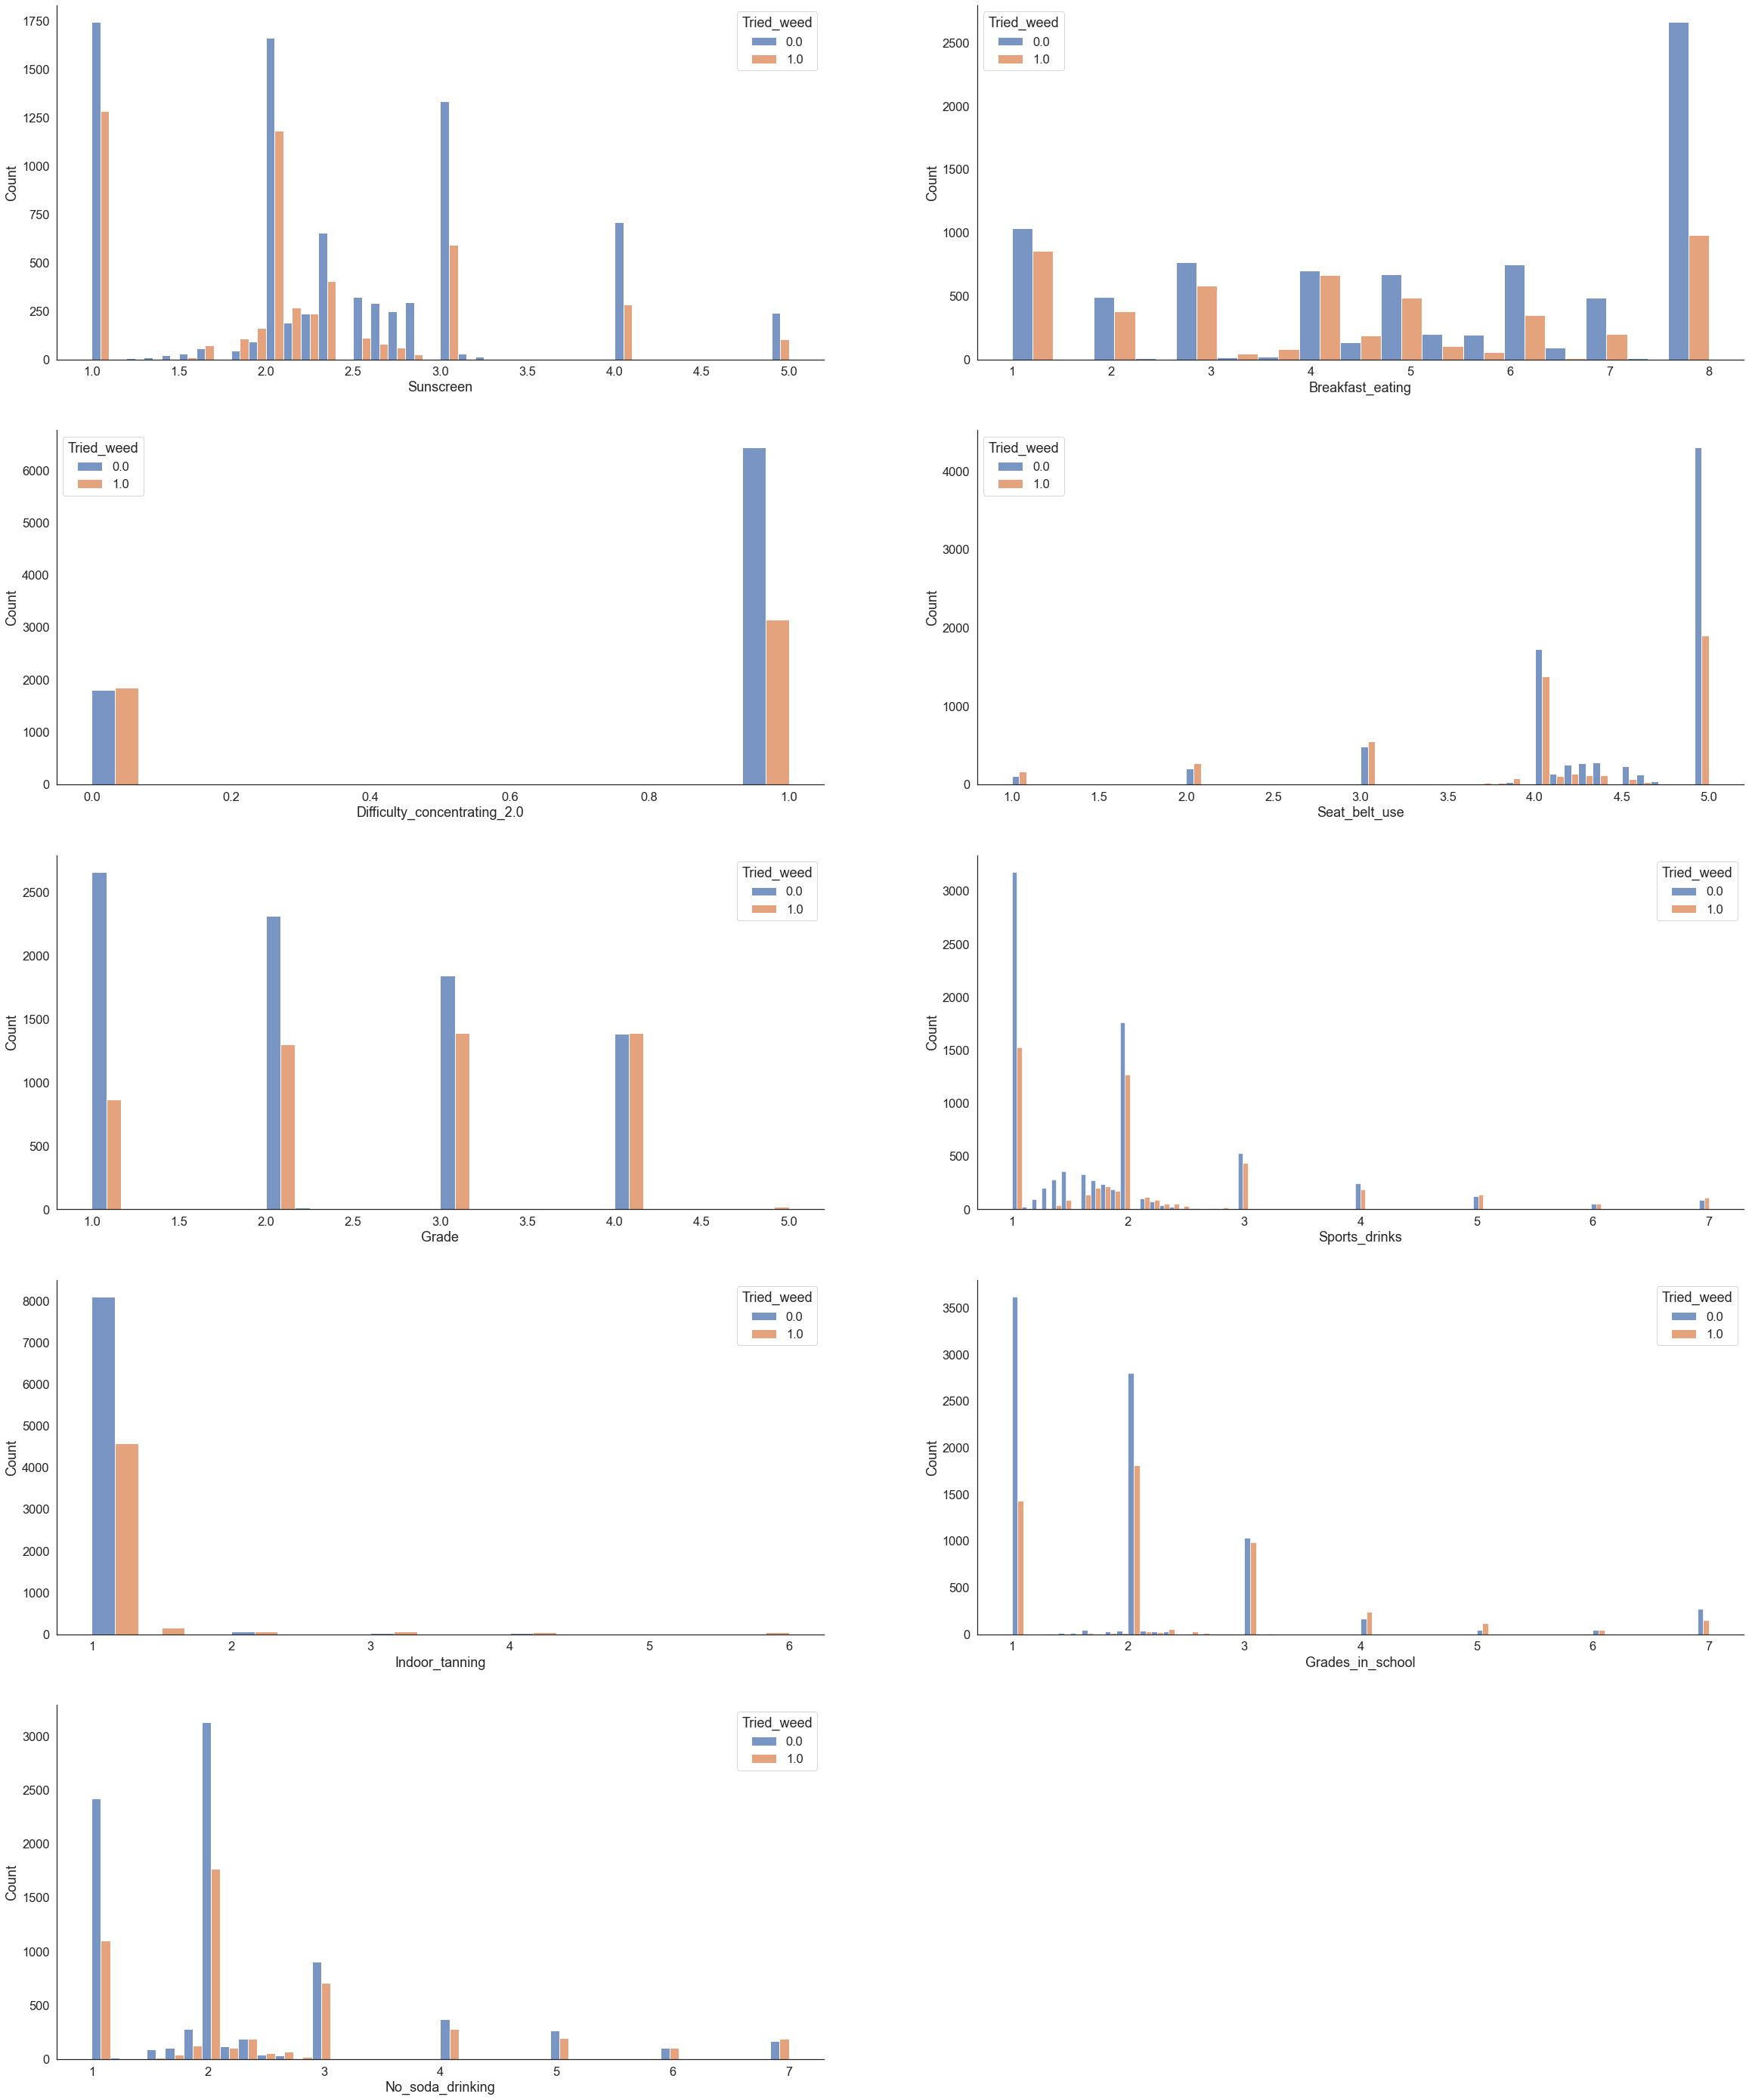

In [62]:
#display how target relate to Drugs usage
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[40,50])
for i in range(9):
    fig.add_subplot(5, 2, i+1)
    #sns.kdeplot(data=data1,x=data1.columns[i+30],hue='Tried_weed')
    sns.histplot(data=df_open_s, x=df_open_s.columns[i+1], hue='Tried_weed',multiple="dodge")
    sns.despine()
    plt.savefig('open_data.png',transparent=True, bbox_inches='tight')

In [63]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [64]:
# fit model no training data
model = XGBClassifier()  #tune gamma #colsample_bytree [default=1, binary:logistic
model.fit(X_train, y_train)  
print(model) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [65]:
#https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [66]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [67]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1403  221]
 [ 582  444]]


0.6969811320754717

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.86      0.78      1624
         1.0       0.67      0.43      0.53      1026

    accuracy                           0.70      2650
   macro avg       0.69      0.65      0.65      2650
weighted avg       0.69      0.70      0.68      2650



In [69]:
import xgboost as xgb

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

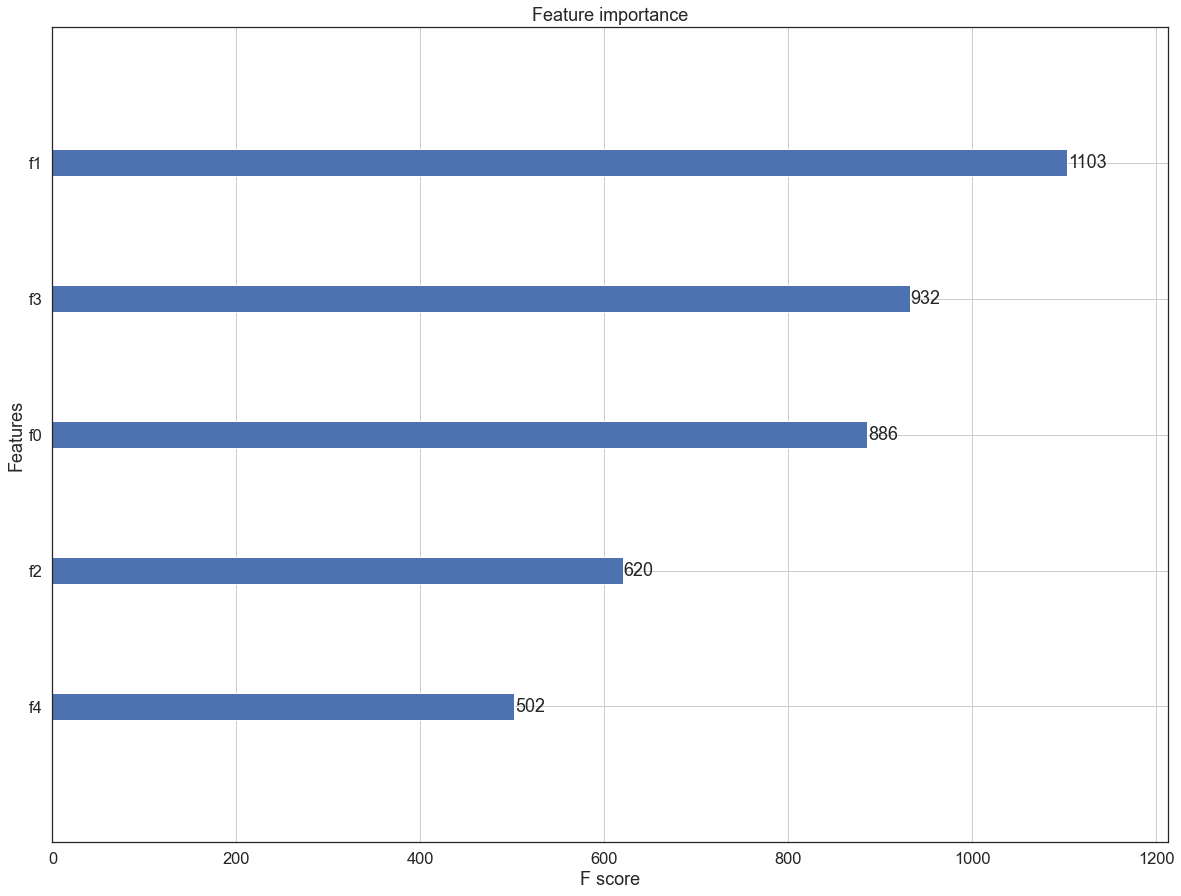

In [70]:
plt.figure(figsize=(20,15)) 
xgb.plot_importance(model, ax=plt.gca())

In [71]:
print("Number of boosting trees: {}".format(model.n_estimators)) 
print("Max depth of trees: {}".format(model.max_depth)) 
print("Objective function: {}".format(model.objective)) 


Number of boosting trees: 100
Max depth of trees: None
Objective function: binary:logistic


In [72]:
Xrf = df.iloc[:, :-1]
yrf = df.iloc[:, -1]

In [73]:
from sklearn.model_selection import train_test_split
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, test_size = 0.2, random_state = 0)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xrf_train = sc.fit_transform(X_train)
Xrf_test = sc.transform(X_test)

In [75]:
# train your model using all data and the best known parameters
rf= RandomForestClassifier(random_state = 0,n_estimators = 1400, min_samples_split = 5, min_samples_leaf = 4, max_features ='sqrt', max_depth = 50, criterion = 'entropy', bootstrap = True)
rf.fit(Xrf_train, yrf_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1400, random_state=0)

In [1]:
df_impt1 = pd.DataFrame({'features':Xrf.columns,'importance':rf.feature_importances_})
df_impt1 = df_impt.sort_values(by='importance',ascending=False)
df_impt1

NameError: name 'pd' is not defined